# Polynomial Regression

Тут я розгляну:
1. Чому потрібна Polynomial Regression
2. Як працює ідея поліноміальних ознак
3. Порівняємо Linear та Polynomial Regression на кривих даних


## 1. Генерація даних

- Створимо нелінійну залежність: y = x² + шум
- Порівняємо, як Linear і Polynomial моделі її апроксимують


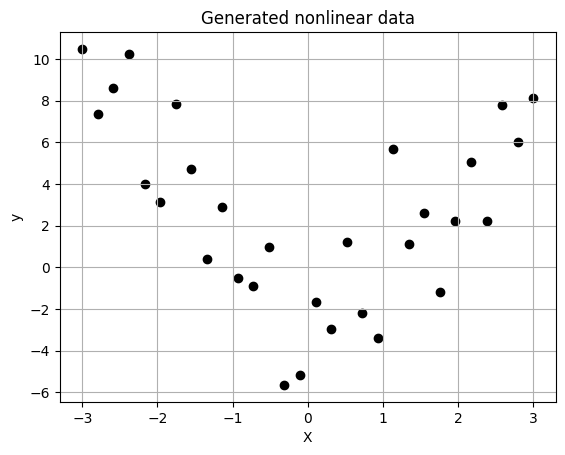

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

np.random.seed(42)

# Дані
n_samples = 30
X = np.linspace(-3, 3, n_samples).reshape(-1,1)
y = X**2 + np.random.randn(n_samples).reshape(-1,1)*3  # нелінійна залежність + шум

plt.scatter(X, y, color='black', label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated nonlinear data')
plt.grid(True)
plt.show()


## 2. Linear Regression

- Підбираємо звичайну лінійну регресію
- Очікуємо погану апроксимацію кривих даних


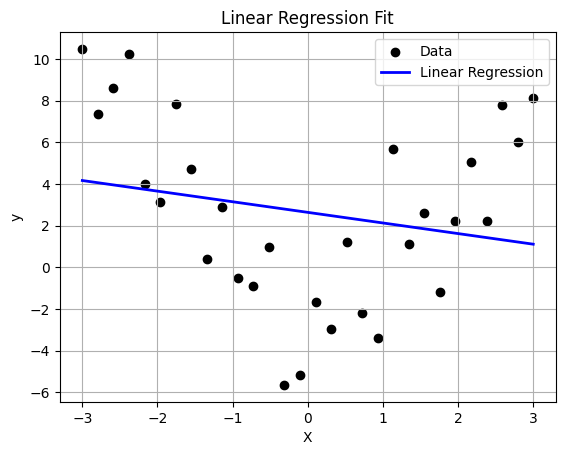

Linear Regression MSE: 18.59


In [5]:
lin_model = LinearRegression()
lin_model.fit(X, y)
y_lin_pred = lin_model.predict(X)

plt.scatter(X, y, color='black', label='Data')
plt.plot(X, y_lin_pred, color='blue', label='Linear Regression', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.show()

# Виведемо MSE
mse_lin = mean_squared_error(y, y_lin_pred)
print(f"Linear Regression MSE: {mse_lin:.2f}")


## 3. Polynomial Regression

- Створимо поліноміальні ознаки: степінь 2 і 3
- Навчимо лінійну регресію на цих ознаках


In [7]:
# Поліном степінь 2
poly2 = PolynomialFeatures(degree=2)
X_poly2 = poly2.fit_transform(X)
poly2_model = LinearRegression().fit(X_poly2, y)
y_poly2_pred = poly2_model.predict(X_poly2)
mse_poly2 = mean_squared_error(y, y_poly2_pred)

# Поліном степінь 3
poly3 = PolynomialFeatures(degree=3)
X_poly3 = poly3.fit_transform(X)
poly3_model = LinearRegression().fit(X_poly3, y)
y_poly3_pred = poly3_model.predict(X_poly3)
mse_poly3 = mean_squared_error(y, y_poly3_pred)


## 4. Візуалізація порівняння

- Показуємо дані та апроксимації трьох моделей


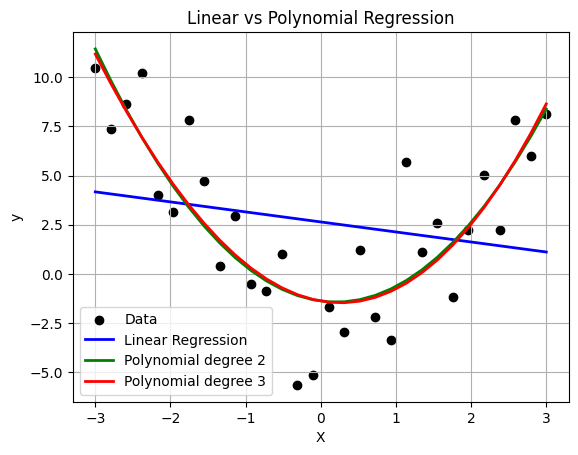

MSE Linear: 18.59
MSE Polynomial degree 2: 5.68
MSE Polynomial degree 3: 5.67


In [8]:
plt.scatter(X, y, color='black', label='Data')
plt.plot(X, y_lin_pred, color='blue', label='Linear Regression', linewidth=2)
plt.plot(X, y_poly2_pred, color='green', label='Polynomial degree 2', linewidth=2)
plt.plot(X, y_poly3_pred, color='red', label='Polynomial degree 3', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear vs Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()

print(f"MSE Linear: {mse_lin:.2f}")
print(f"MSE Polynomial degree 2: {mse_poly2:.2f}")
print(f"MSE Polynomial degree 3: {mse_poly3:.2f}")


## 5. Висновки

- Linear Regression не здатна адекватно передбачати нелінійні залежності  
- Polynomial Regression дозволяє розширювати ознаки, зберігаючи лінійність по коефіцієнтах  
- Степінь полінома визначає гнучкість моделі:  
    - занадто малий → недонавчання  
    - занадто великий → перенавчання  
- На графіку видно, як Polynomial краще підходить до кривих даних
